<h1>Getting datasets from google drive to workspace </h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/MyDrive/liveness_dataset.zip" "/content"

In [ ]:
import zipfile
archive = zipfile.ZipFile('/content/liveness_dataset.zip')
archive.extractall('/content')

<h1>Data Preprocessing </h1>

<h2> Four Steps </h2>
<h3>Step 1: Create new directory structure for the datasets</h3>
<h3>Step 2: Copying images into new directory structure </h3>
<h3>Step 3: Dataset Exploration </h3>
<h4> Step 4: Dataset Visualization </h3>

<h3>Step 1 </h1>

<h2>Original VS New Directory Structure</h2>

In [ ]:
dataset_dir = '/content/liveness_dataset'
train_dataset_dir = '/content/liveness_dataset/train'
test_dataset_dir = '/content/liveness_dataset/test'

In [ ]:
import os
os.mkdir('/content/liveness_dataset')
os.mkdir('/content/liveness_dataset/train')
os.mkdir('/content/liveness_dataset/test')
os.mkdir('/content/liveness_dataset/train/real')
os.mkdir('/content/liveness_dataset/train/spoof')
os.mkdir('/content/liveness_dataset/test/real')
os.mkdir('/content/liveness_dataset/test/spoof')

In [ ]:
train_dir='/content/liveness_dataset/train'
test_dir = '/content/liveness_dataset/test'

<h3>Step 2 </h3>

In [ ]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory,split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category,subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(train_dir,category,img))
          else:
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(test_dir,category,img))

In [ ]:
train_test_splits(data_directory=dataset_dir)

<h3>Step 3 </h3>

<h3>Dataset Exploration </h3>

In [ ]:
categories = ['real','spoof']

In [ ]:
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 3896 images in real directory
There are 3585 images in spoof directory
There are 7481 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 1429 images in real directory
There are 1308 images in spoof directory
There are 2737 total images in testing directory


<h3>Step 4 : Dataset Visualization </h3>

In [ ]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [ ]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()


In [ ]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['/content/antispoofing_dataset/train/real/Shikshya Gautam29.jpg', '/content/antispoofing_dataset/train/real/Sudeep Subedi37hr_flip.jpg', '/content/antispoofing_dataset/train/real/hghgh23.jpg', '/content/antispoofing_dataset/train/real/sumit_shrestha_38_face.jpg', '/content/antispoofing_dataset/train/real/Suraj Khanal18brightness1.19.jpg', '/content/antispoofing_dataset/train/real/Suraj Khanal44.jpg', '/content/antispoofing_dataset/train/real/sumit_shrestha_51_face.jpg', '/content/antispoofing_dataset/train/real/prakriti_adhikari_132_face.jpg', '/content/antispoofing_dataset/train/real/Suraj Khanal16hr_flip.jpg', '/content/antispoofing_dataset/train/real/Suraj Khanal19hr_flipbrightness1.1.jpg', '/content/antispoofing_dataset/train/real/dfjsdfjk17.jpg', '/content/antispoofing_dataset/train/real/d_5_face.jpg', '/content/antispoofing_dataset/train/real/Rihan Ale26.jpg', '/content/antispoofing_dataset/train/real/prakriti_adhikari_95_face.jpg', '/content/antispoofing_dataset/train/real/Sali

<h3>Training Dataset Visualization</h3>

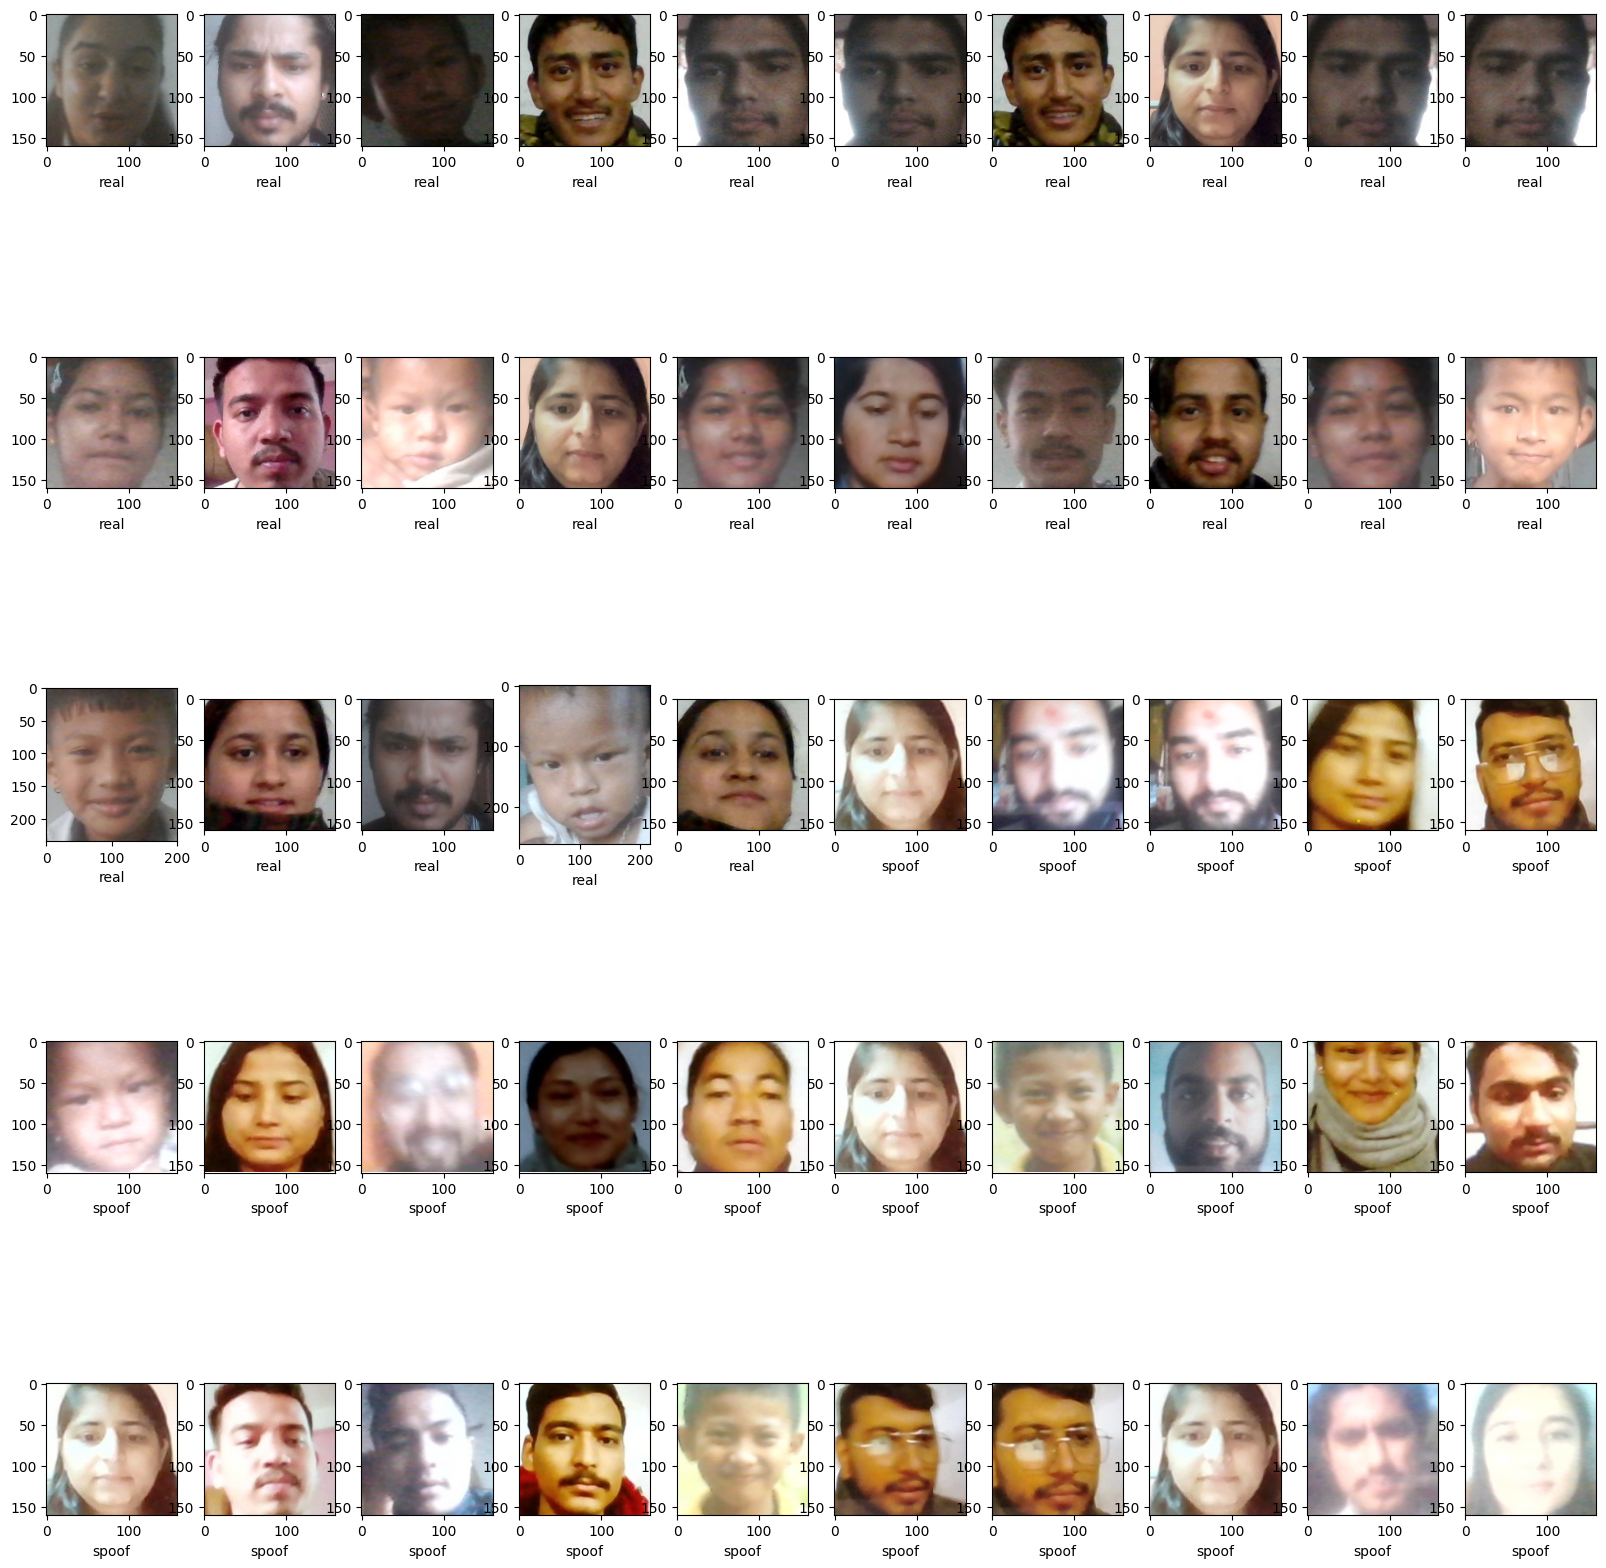

In [ ]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

Testing Dataset Visualization

In [ ]:
testing_image_path = get_images(data_dir= test_dir,number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path))

['/content/antispoofing_dataset/test/real/WIN_20201110_10_12_18_Prohr_flipbrightness1.18.jpg', '/content/antispoofing_dataset/test/real/WIN_20201119_10_49_00_Prohr_flip.jpg', '/content/antispoofing_dataset/test/real/shinja_thapa_45_face.jpg', '/content/antispoofing_dataset/test/real/rftfyhbjnk24.jpg', '/content/antispoofing_dataset/test/real/sashi_bhusal_30_face.jpg', '/content/antispoofing_dataset/test/real/prakriti_adhikari_287_face.jpg', '/content/antispoofing_dataset/test/real/jkhjhj17.jpg', '/content/antispoofing_dataset/test/real/hehehe2.jpg', '/content/antispoofing_dataset/test/real/Sunil Koirala10.jpg', '/content/antispoofing_dataset/test/real/ujjwal_gautam_40_face.jpg', '/content/antispoofing_dataset/test/real/hehehe42.jpg', '/content/antispoofing_dataset/test/real/received_3508051902619783hr_flip.jpg', '/content/antispoofing_dataset/test/real/jkhjhj49.jpg', '/content/antispoofing_dataset/test/real/bishal_bhattarai_4_face.jpg', '/content/antispoofing_dataset/test/real/prakriti

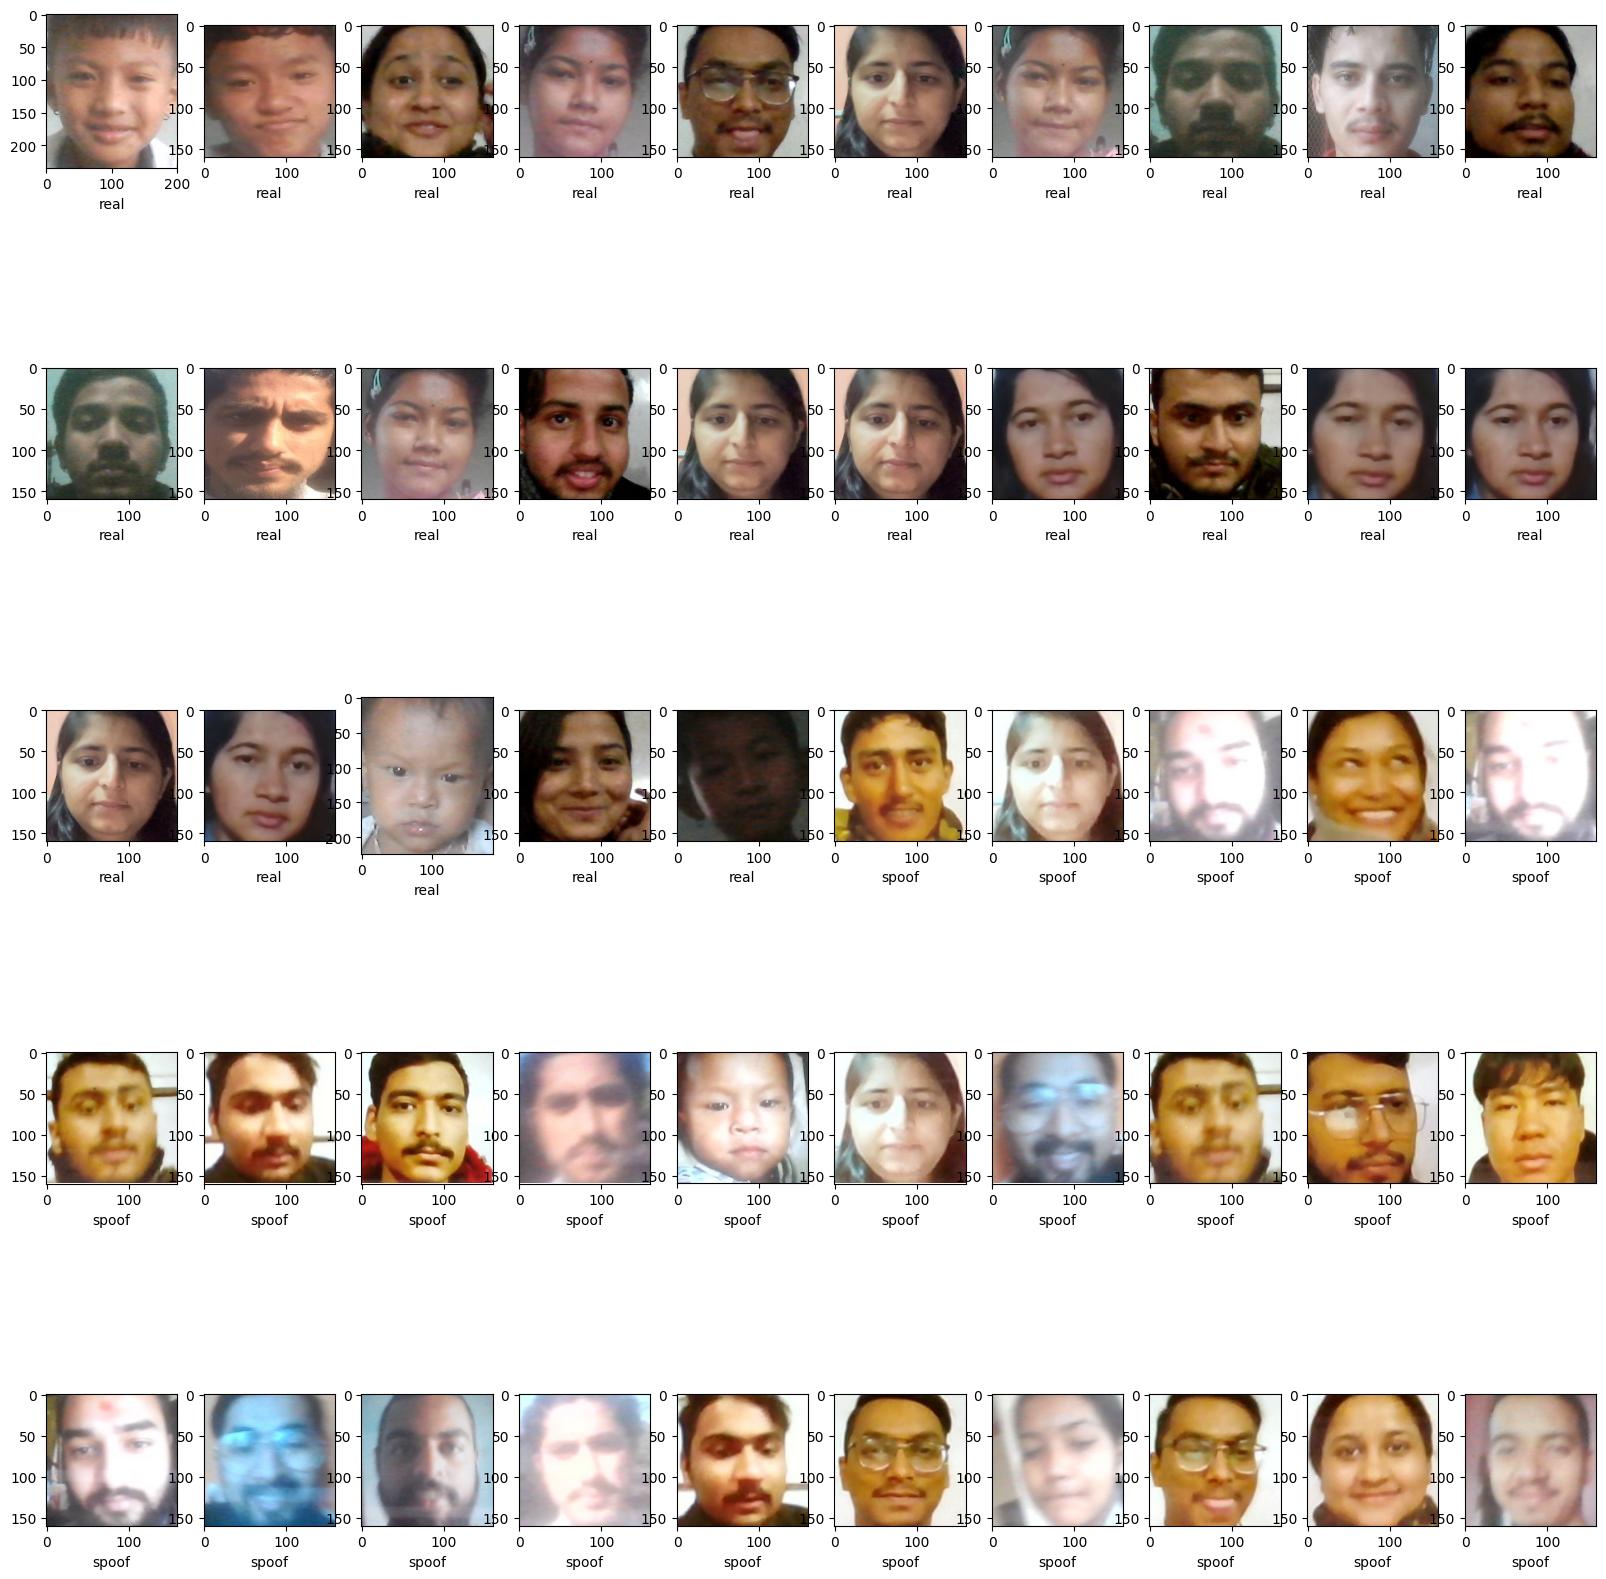

In [ ]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

**<h3>Model Preparation</h3>**

<h3>Steps In Model Preparation</h3>
<h4>1. Choosing Framework and importing necessary libraries </h2>
<h4> 2. Load datasets and Perform image augmentations </h2>
<h4> 3. Model Selection  </h3>
<h4> 4. Compiling our model </h4>
<h4> 5. Setting our model checkpoints </h4>


<h4>Step 1 Keras Framework </h1>

In [ ]:
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json

<h4>Step 2 </h4>

In [ ]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),color_mode='rgb',
                                                    class_mode='binary',batch_size=32,shuffle=True)

Found 7481 images belonging to 2 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(test_dir,target_size=(224,224),color_mode='rgb',
                                                    class_mode='binary',batch_size=32)

Found 2737 images belonging to 2 classes.


<h4>Step 3 Model Selection and Transfer Learning</h4>

In [ ]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
mobilenet.trainable = False

In [ ]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [ ]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']         

<h4>Step 4 Compiling the models </h4>

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

<h4>Step 5 Setting our model checkpoints </h4>

In [ ]:
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/mobilenetv2.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = valid_generator, 
    validation_steps = valid_generator.samples // 32,
    epochs = 100,
    callbacks=[model_checkpoint])

<ipython-input-33-61fac8fe248f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
299/299 [==============================] - ETA: 0s - loss: 0.8568 - accuracy: 0.5266
Epoch 1: val_loss improved from inf to 0.68533, saving model to /content/drive/MyDrive/mobilenetv2.h5
299/299 [==============================] - 76s 245ms/step - loss: 0.8568 - accuracy: 0.5266 - val_loss: 0.6853 - val_accuracy: 0.5809
Epoch 2/100
299/299 [==============================] - ETA: 0s - loss: 0.7214 - accuracy: 0.5842
Epoch 2: val_loss improved from 0.68533 to 0.62400, saving model to /content/drive/MyDrive/mobilenetv2.h5
299/299 [==============================] - 67s 223ms/step - loss: 0.7214 - accuracy: 0.5842 - val_loss: 0.6240 - val_accuracy: 0.6965
Epoch 3/100
299/299 [==============================] - ETA: 0s - loss: 0.6534 - accuracy: 0.6325
Epoch 3: val_loss improved from 0.62400 to 0.58163, saving model to /content/drive/MyDrive/mobilenetv2.h5
299/299 [==============================] - 66s 219ms/step - loss: 0.6534 - accuracy: 0.6325 - val_loss: 0.5816 - val_accuracy: 

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/mobilenetv2.json", "w") as json_file:
    json_file.write(model_json)

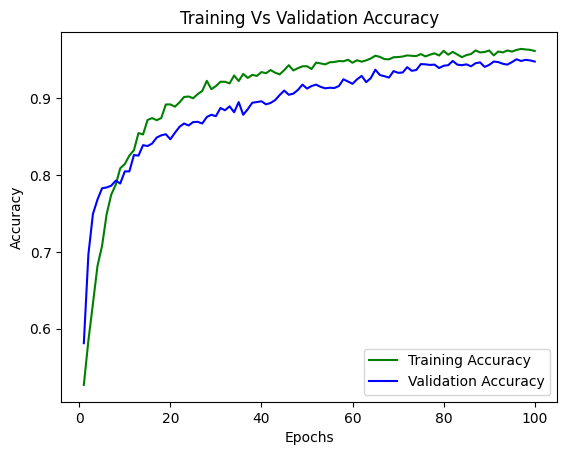

In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    

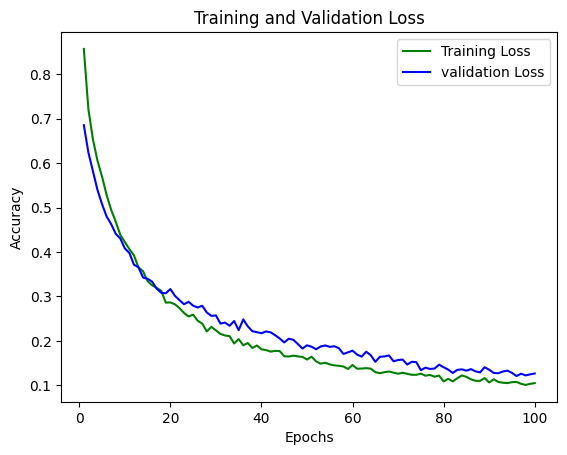

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()